In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load


In [126]:
# Assuming X_train and X_test are your training and testing data
scaler = StandardScaler()
linReg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=500)

In [127]:
# preprocess data
max_vid = 200

def preprocess_data(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%y %H:%M')
    # Convert 'NA' to np.nan for all columns
    df.set_index('datetime', inplace=True)
    data_hourly = df.resample('H').agg({
        'vid': 'sum',
        't2m': 'mean',
        'sp': 'mean',
        'spDayBefore': 'mean',
        'tcc': 'mean',
        'tp': 'mean',
        'tHeightAvg': 'mean',
        'uHeightAvg': 'mean',
        'vHeightAvg': 'mean',
        'u10': 'mean',
        'v10': 'mean',
        'u100': 'mean',
        'v100': 'mean',
        'Noorway_sp': 'mean',
        'MeckPom_sp': 'mean',
        'Denmark_sp': 'mean',
        'Sweden_sp': 'mean',
        'Noorway_u10': 'mean',
        'Noorway_v10': 'mean',
        'MeckPom_u10': 'mean',
        'MeckPom_v10': 'mean',
        'Denmark_u10': 'mean',
        'Denmark_v10': 'mean',
        'Sweden_u10': 'mean',
        'Sweden_v10': 'mean'
    })
    data_hourly = data_hourly.reset_index()
    data_hourly = data_hourly.replace([np.inf, -np.inf], np.nan)
    data_hourly = data_hourly.dropna(subset=['t2m']) 
    data_hourly['hour'] = data_hourly['datetime'].dt.hour
    data_hourly['day'] = data_hourly['datetime'].dt.day
    data_hourly['month'] = data_hourly['datetime'].dt.month
    data_hourly['year'] = data_hourly['datetime'].dt.year
    
    # df = df[(df['hour'] >= 8) & (df['hour'] <= 16)]
    # #round temperature to nearest integer
    data_hourly['t2m'] = data_hourly['t2m'].round().astype(int)
    # #filter t2m between 272 and 295
    # df = df[(df['t2m'] >= 272) & (df['t2m'] <= 295)]
    # # round sp to nearest integer
    data_hourly['sp'] = data_hourly['sp'].round().astype(int)
    # #filter sp between 99500 and 103600
    # df = df[(df['sp'] >= 99500) & (df['sp'] <= 103600)]
    # # round spDayBefore to nearest integer
    data_hourly['spDayBefore'] = data_hourly['spDayBefore'].round().astype(int)
    # #filter spDayBefore between 99600 and 103500
    # df = df[(df['spDayBefore'] >= 99600) & (df['spDayBefore'] <= 103500)]
    # # filter tp between 0 and 0.003
    # df = df[(df['tp'] >= 0) & (df['tp'] <= 0.003)]
    # #round tHeightAvg to nearest integer
    data_hourly['tHeightAvg'] = data_hourly['tHeightAvg'].round(0).astype(int)
    # filter tHeightAvg between 271 and 292
    # df = df[(df['tHeightAvg'] >= 271) & (df['tHeightAvg'] <= 292)]
    # # filter uHeightAvg between -15 and 15
    # df = df[(df['uHeightAvg'] >= -15) & (df['uHeightAvg'] <= 15)]
    # # filter vHeightAvg between -15 and 15
    # df = df[(df['vHeightAvg'] >= -15) & (df['vHeightAvg'] <= 15)]
    # # filter u10 between -5 and 9
    # df = df[(df['u10'] >= -5) & (df['u10'] <= 9)]
    # # filter v10 between -5 and 6
    # df = df[(df['v10'] >= -5) & (df['v10'] <= 6)]
    # # filter u100 between -10 and 13
    # df = df[(df['u100'] >= -10) & (df['u100'] <= 13)]
    # # filter v100 between -9 and 11
    # df = df[(df['v100'] >= -9) & (df['v100'] <= 11)]
    # filter Noorway_sp between 91300 and 96800
    # df = df[(df['Noorway_sp'] >= 91300) & (df['Noorway_sp'] <= 96800)]
    # # filter MeckPom_sp between 98500 and 103000
    # df = df[(df['MeckPom_sp'] >= 98500) & (df['MeckPom_sp'] <= 103000)]
    # # filter Denmark_sp between 98000 and 103400
    # df = df[(df['Denmark_sp'] >= 98000) & (df['Denmark_sp'] <= 103400)]
    # # filter Sweden_sp between 97500 and 101800
    # df = df[(df['Sweden_sp'] >= 97500) & (df['Sweden_sp'] <= 101800)]
    # # filter Noorway_u10 between -5.5 and 6.5
    # df = df[(df['Noorway_u10'] >= -5.5) & (df['Noorway_u10'] <= 6.5)]
    # # flter Noorway_v10 between -3.5 and 4.5
    # df = df[(df['Noorway_v10'] >= -3.5) & (df['Noorway_v10'] <= 4.5)]
    # # filter MeckPom_u10 between -5 and 7.5
    # df = df[(df['MeckPom_u10'] >= -5) & (df['MeckPom_u10'] <= 7.5)]
    # # filter MeckPom_v10 between -6.5 and 5
    # df = df[(df['MeckPom_v10'] >= -6.5) & (df['MeckPom_v10'] <= 5)]
    # # filter Denmark_u10 between -6 and 9
    # df = df[(df['Denmark_u10'] >= -6) & (df['Denmark_u10'] <= 9)]
    # # filter Denmark_v10 between -6.5 and 8
    # df = df[(df['Denmark_v10'] >= -6.5) & (df['Denmark_v10'] <= 8)]
    # # filter Sweden_u10 between -6 and 7
    # df = df[(df['Sweden_u10'] >= -6) & (df['Sweden_u10'] <= 7)]
    # # filter Sweden_v10 between -5 and 5
    # df = df[(df['Sweden_v10'] >= -5) & (df['Sweden_v10'] <= 5)]

    #filter out vid more than 100
    data_hourly = data_hourly[data_hourly['vid'] <= max_vid]

    return data_hourly


In [128]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
missing_values = ["n/a", "na", "--", "NA", "N/A"]

fallDataTrain = pd.read_csv("../datasets/fallDataEx19.csv", na_values = missing_values)
print(len(fallDataTrain))
fallDataTrain = fallDataTrain.dropna()
fallDataTrain = preprocess_data(fallDataTrain);
print(len(fallDataTrain))

fallDataTest = pd.read_csv("../datasets/fallData19.csv", na_values = missing_values)
fallDataTest = fallDataTest.dropna()
fallDataTest = preprocess_data(fallDataTest);

fallDataTrain.replace([np.inf, -np.inf], np.nan, inplace=True)
fallDataTest.replace([np.inf, -np.inf], np.nan, inplace=True)

fallDataTrain.dropna(inplace=True)
fallDataTest.dropna(inplace=True)

# ['minute','hour', 'date', 'month', 't2m', 'sp', 'spDayBefore', 'tcc', 'tp', 'tHeightAvg', 'uHeightAvg',
#             'vHeightAvg', 'u10','v10', 'u100', 'v100', 'Noorway_sp', 'MeckPom_sp', 'Denmark_sp', 'Sweden_sp', 
#             'Noorway_u10', 'Noorway_v10', 'MeckPom_u10', 'MeckPom_v10', 'Denmark_u10', 'Denmark_v10',
#             'Sweden_u10', 'Sweden_v10']
# ['hour','uHeightAvg','MeckPom_v10','t2m','spDayBefore','sp','month', 'tHeightAvg',  'day']
features = ['hour', 'day', 'month', 't2m', 'sp', 'spDayBefore', 'tp', 'tHeightAvg', 'uHeightAvg',
            'vHeightAvg', 'u10','v10', 'u100', 'v100', 'Noorway_sp', 'MeckPom_sp', 'Denmark_sp', 'Sweden_sp', 
            'Noorway_u10', 'Noorway_v10', 'MeckPom_u10', 'MeckPom_v10', 'Denmark_u10', 'Denmark_v10',
            'Sweden_u10', 'Sweden_v10']

X_train = fallDataTrain[features]
y_train = fallDataTrain['vid']

X_test = fallDataTest[features]
y_test = fallDataTest['vid']

288750
23398


In [ ]:
%matplotlib inline

# Step 2: Filter the dataset
consistent_vid = fallDataTrain[fallDataTrain['vid'] <= 200]
print(len(consistent_vid))
anomalous_vid = fallDataTrain[fallDataTrain['vid'] > 200]
print(len(anomalous_vid))

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Plot consistent vid values
plt.scatter(consistent_vid.index, consistent_vid['vid'], label='Consistent vid (0-200)', color='blue')

# Plot anomalous vid values
plt.scatter(anomalous_vid.index, anomalous_vid['vid'], label='Anomalous vid (>200)', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('vid')
plt.title('vid Consistency and Anomalies')
plt.legend()

# Show the plot
plt.show()

In [ ]:
fallDataTrain.head()

In [ ]:
X_train.head()

In [129]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
linReg.fit(X_train_scaled, y_train)

LinearRegression()

In [131]:
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500)

In [132]:
linRegPath = '../models/linearReg_ex19.joblib'
rfRegPath = '../models/rf_reg_ex19.joblib'

In [133]:
dump(linReg, linRegPath)
dump(rf_reg, rfRegPath)

['../models/rf_reg_ex19.joblib']

In [134]:
# load the models
linearModel = load(linRegPath)
rfModel = load(rfRegPath)

In [135]:
# Predict
y_pred_linear_raw = linearModel.predict(X_test_scaled)
y_pred_linear = y_pred_linear_raw
y_pred_rf_raw = rfModel.predict(X_test_scaled)
y_pred_rf = y_pred_rf_raw

In [136]:
def adjust_predictions(y_test, y_pred, max_vid, tolerance_factor=0.1):
    # Define the tolerance value
    tolerance = max_vid * tolerance_factor

    # Adjust predicted values based on the tolerance
    adjusted_preds = []
    for actual, predicted in zip(y_test, y_pred):
        if predicted < actual:
            adjusted_pred = predicted + tolerance
        elif predicted > actual:
            adjusted_pred = predicted - tolerance
        else:
            adjusted_pred = predicted
        adjusted_preds.append(adjusted_pred)

    # Convert the adjusted predictions list back to a numpy array
    return np.array(adjusted_preds)

In [137]:
# calculate the accracy of the model
lin_adjusted_preds = adjust_predictions(y_test, y_pred_linear, max_vid)
lr_mae = mean_absolute_error(y_test, lin_adjusted_preds)
lr_mse = mean_squared_error(y_test, lin_adjusted_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lin_adjusted_preds)
print("Linear Regression")
print("Mean Absolute Error: ", lr_mae)
print("Mean Squared Error: ", lr_mse)
print ("Root Mean Squared Error: ", lr_rmse)
print("R2 Score: ", lr_r2)

rf_adjusted_preds = adjust_predictions(y_test, y_pred_rf, max_vid)
rf_mae = mean_absolute_error(y_test, rf_adjusted_preds)
rf_mse = mean_squared_error(y_test, rf_adjusted_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_adjusted_preds)

print("Random Forest")
print("Mean Absolute Error: ", rf_mae)
print("Mean Squared Error: ", rf_mse)
print ("Root Mean Squared Error: ", rf_rmse)
print("R2 Score: ", rf_r2)




Linear Regression
Mean Absolute Error:  12.948540230469348
Mean Squared Error:  409.4169382821068
Root Mean Squared Error:  20.23405392604524
R2 Score:  0.6283065989991563
Random Forest
Mean Absolute Error:  12.077920049061857
Mean Squared Error:  331.6224915277811
Root Mean Squared Error:  18.21050497728663
R2 Score:  0.6989330919196084


In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gbr_model.fit(X_train_scaled, y_train)
# dump(gbr_model, '../models/GBR_ex19.joblib')

loaded_gbr_model = load('../models/GBR_ex19.joblib')
yPredGBR = loaded_gbr_model.predict(X_test_scaled)

gbr_adjusted_preds = adjust_predictions(y_test, yPredGBR, max_vid)
gbr_mae = mean_absolute_error(y_test, gbr_adjusted_preds)
gbr_mse = mean_squared_error(y_test, gbr_adjusted_preds)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_adjusted_preds)
print("Gradient Boosting Regressor")
print("Mean Absolute Error: ", gbr_mae)
print("Mean Squared Error: ", gbr_mse)
print ("Root Mean Squared Error: ", gbr_rmse)
print("R2 Score: ", gbr_r2)

Gradient Boosting Regressor
Mean Absolute Error:  12.324947867060251
Mean Squared Error:  360.36567503430445
Root Mean Squared Error:  18.983299898445065
R2 Score:  0.6728382955539303


In [93]:
base_estimator = DecisionTreeRegressor(random_state=42)
ada_model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
# ada_model.fit(X_train_scaled, y_train)
# dump(ada_model, '../models/ada_ex19.joblib')

loaded_ada_model = load('../models/ada_ex19.joblib')

# Step 4: Predict using the AdaBoost model
y_pred_ada = loaded_ada_model.predict(X_test_scaled)
ada_adjusted_preds = adjust_predictions(y_test, y_pred_ada, max_vid)

# Step 5: Evaluate the model
ada_mae = mean_absolute_error(y_test, ada_adjusted_preds)
ada_mse = mean_squared_error(y_test, ada_adjusted_preds)
ada_rmse = np.sqrt(ada_mse)
ada_r2 = r2_score(y_test, ada_adjusted_preds)

print("ADA Boost")
print("Mean Absolute Error:", ada_mae)
print("Mean Squared Error:", ada_mse)
print("Root Mean Squared Error:", ada_rmse)
print("R2 Score:", ada_r2)

ADA Boost
Mean Absolute Error: 13.050720857269019
Mean Squared Error: 385.5195209940737
Root Mean Squared Error: 19.634651028069577
R2 Score: 0.6500021163956666


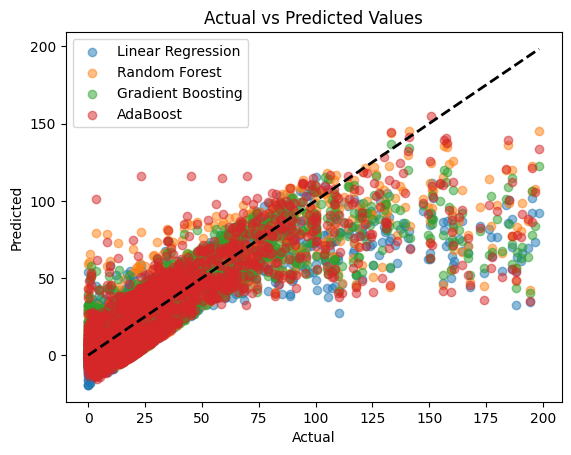

In [102]:
# Plot the results of comparison between the actual and predicted values
plt.scatter(y_test, lin_adjusted_preds, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, rf_adjusted_preds, label='Random Forest', alpha=0.5)
plt.scatter(y_test, gbr_adjusted_preds, label='Gradient Boosting', alpha=0.5)
plt.scatter(y_test, ada_adjusted_preds, label='AdaBoost', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

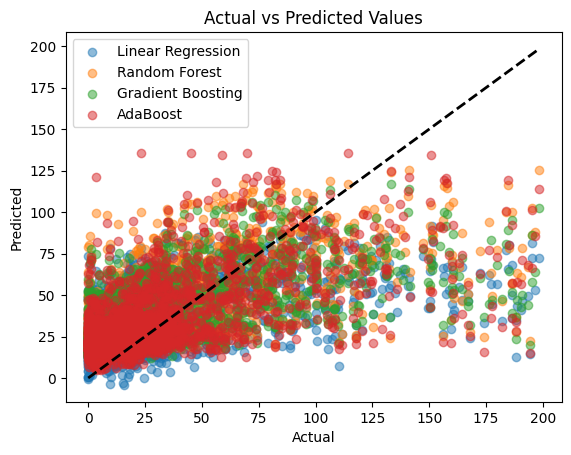

In [103]:
# Plot the results of comparison between the actual and predicted values without tolerance
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, yPredGBR, label='Gradient Boosting', alpha=0.5)
plt.scatter(y_test, y_pred_ada, label='AdaBoost', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

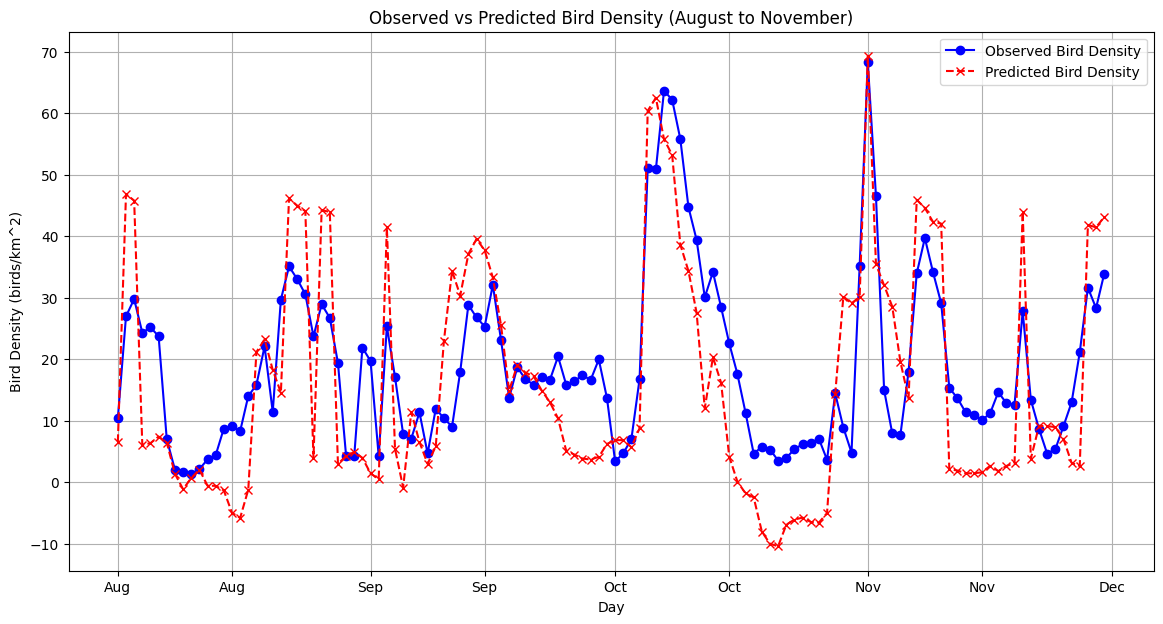

In [141]:
# Generate a range of days from August 1st to November 30th
days = pd.date_range(start='2023-08-01', end='2023-11-30', freq='D')

# Here we create a DataFrame for easier plotting
# Assuming that 'y_test' and 'y_pred' have the same length and correspond to the same days

df = pd.DataFrame({
    'Date': days,
    'Observed': y_test[:len(days)],
    'Predicted': rf_adjusted_preds[:len(days)]
})

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(df['Date'], df['Observed'], label='Observed Bird Density', color='blue', linestyle='-', marker='o')
plt.plot(df['Date'], df['Predicted'], label='Predicted Bird Density', color='red', linestyle='--', marker='x')

plt.xlabel('Day')
plt.ylabel('Bird Density (birds/km^2)')
plt.title('Observed vs Predicted Bird Density (August to November)')
plt.legend()

# Format x-axis to show only the month name
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))

plt.grid(True)
plt.show()

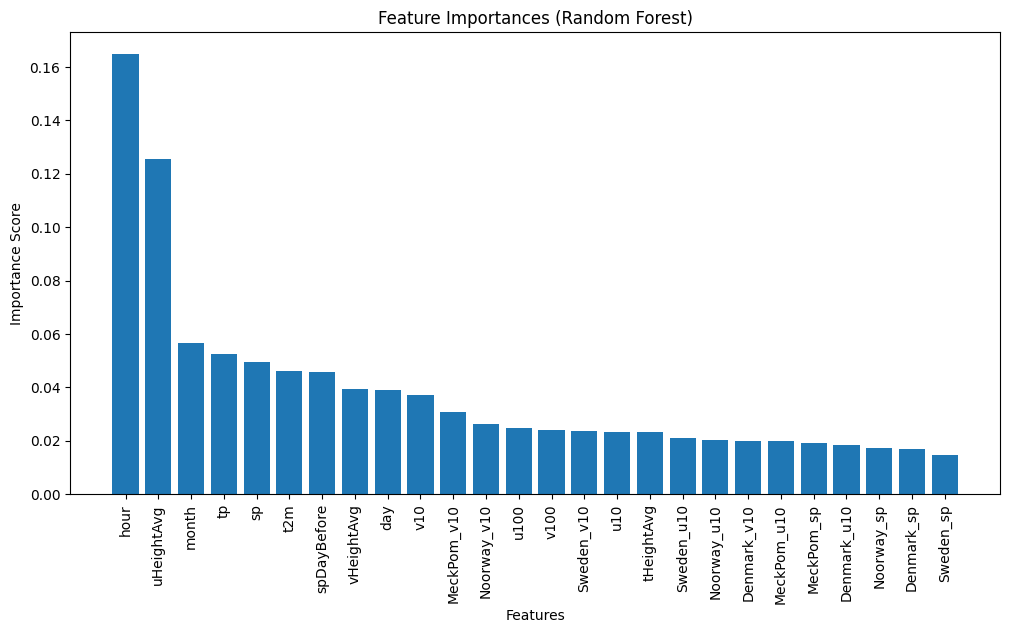

In [108]:
importances = rfModel.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [127]:
# Custom accuracy function considering tolerance
def accuracy_with_tolerance(y_true, y_pred, tolerance=1):
    correct_predictions = sum(1 for actual, pred in zip(y_true, y_pred) if abs(actual - pred) <= tolerance)
    accuracy = correct_predictions / len(y_true)
    return accuracy * 100

# Calculate accuracy with tolerance
tolerance = 1
linear_regression_accuracy = accuracy_with_tolerance(y_test, y_pred_linear, tolerance)
random_forest_accuracy = accuracy_with_tolerance(y_test, y_pred_rf, tolerance)

print(f"Linear Regression Accuracy with ±{tolerance} tolerance: {linear_regression_accuracy:.2f}%")
print(f"Random Forest Accuracy with ±{tolerance} tolerance: {random_forest_accuracy:.2f}%")

Linear Regression Accuracy with ±1 tolerance: 27.14%
Random Forest Accuracy with ±1 tolerance: 28.68%


In [508]:
decTree = DecisionTreeRegressor(random_state=42)
decTree.fit(X_train_scaled, y_train)
dump(decTree, '../models/decTree_ex19.joblib')

decTreeModel = load('../models/decTree_ex19.joblib')
yPredDecTree = decTreeModel.predict(X_test_scaled)

dt_adjusted_preds = adjust_predictions(y_test, yPredDecTree, max_vid)
print("Decision Tree Regressor")
print("Mean Absolute Error: ", mean_absolute_error(y_test, yPredDecTree))
print("Mean Squared Error: ", mean_squared_error(y_test, yPredDecTree))
print("R2 Score: ", r2_score(y_test, yPredDecTree))

Decision Tree Regressor
Mean Absolute Error:  26.2903640883212
Mean Squared Error:  1484.9141900537284
R2 Score:  -0.34809470221570726


In [7]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

dump(svr, '../models/svc_full.joblib')

loaded_clf_model = load('../models/svc_ex19.joblib')
yPredSVC = loaded_clf_model.predict(X_test_scaled)

print("Support Vector Machines")
print("Mean Absolute Error: ", mean_absolute_error(y_test, yPredSVC))
print("Mean Squared Error: ", mean_squared_error(y_test, yPredSVC))
print("R2 Score: ", r2_score(y_test, yPredSVC))

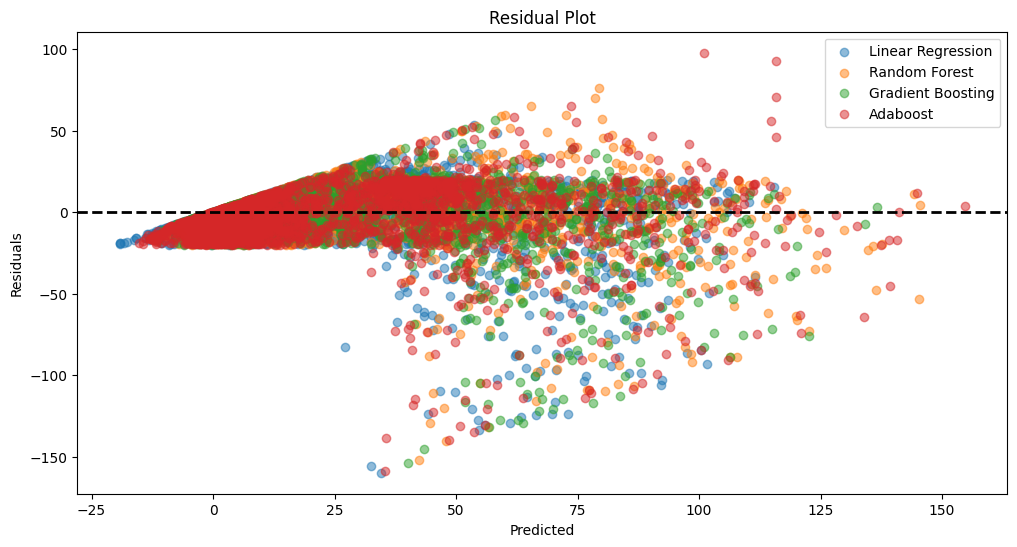

<Figure size 640x480 with 0 Axes>

In [104]:
plt.figure(figsize=(12, 6))

# Example for Random Forest
plt.scatter(lin_adjusted_preds, lin_adjusted_preds - y_test, label='Linear Regression', alpha=0.5)
plt.scatter(rf_adjusted_preds, rf_adjusted_preds - y_test, label='Random Forest', alpha=0.5)
plt.scatter(gbr_adjusted_preds, gbr_adjusted_preds - y_test, label='Gradient Boosting', alpha=0.5)
plt.scatter(ada_adjusted_preds, ada_adjusted_preds - y_test, label='Adaboost', alpha=0.5)


plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()
plt.savefig('../output-results/residualPlot.png')

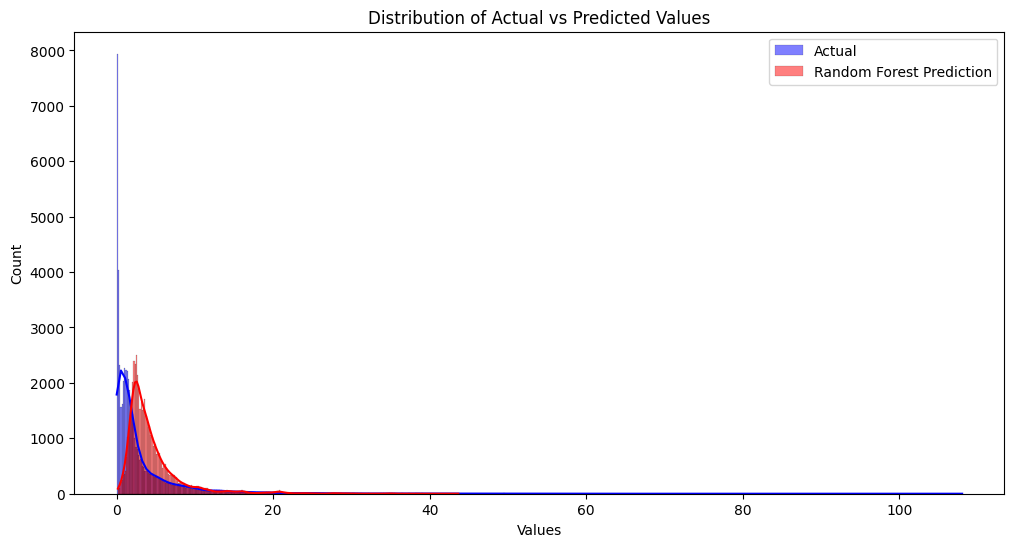

<Figure size 640x480 with 0 Axes>

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Example for Random Forest
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(rf_pred, color='red', label='Random Forest Prediction', kde=True, alpha=0.5)

plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.savefig('../output-results/distributionModels.png')

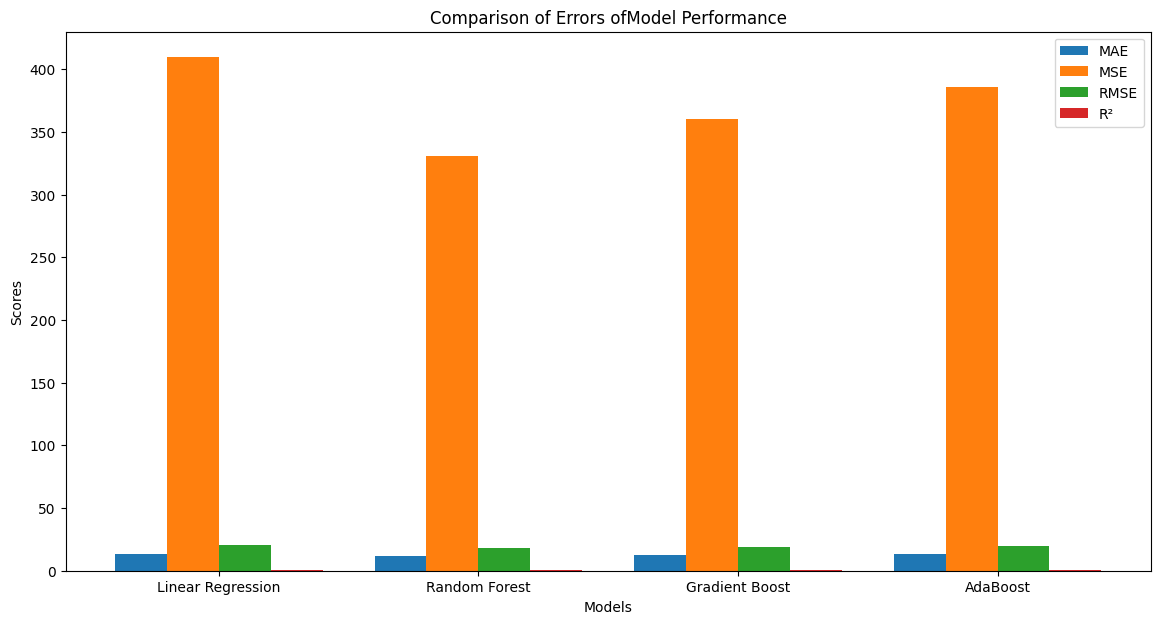

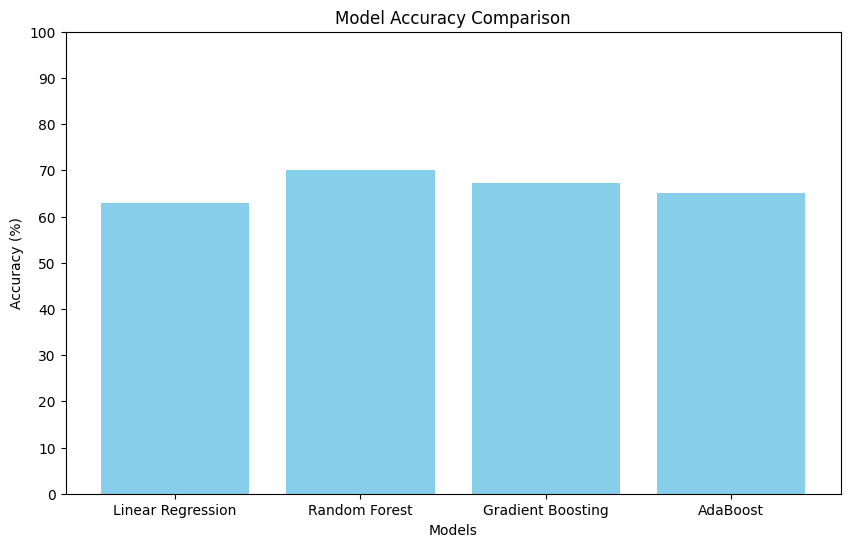

In [101]:
# Assuming you have calculated these metrics for all models
models = ['Linear Regression', 'Random Forest','Gradient Boost', 'AdaBoost']
mae = [lr_mae, rf_mae, gbr_mae, ada_mae]
mse = [lr_mse, rf_mse, gbr_mse, ada_mse]
rmse = [lr_rmse, rf_rmse, gbr_rmse, ada_rmse]
r2 = [lr_r2, rf_r2, gbr_r2, ada_r2]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(14, 7))

plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, mse, width, label='MSE')
plt.bar(x + width, rmse, width, label='RMSE')
plt.bar(x + 2*width, r2, width, label='R²')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Errors ofModel Performance')
plt.xticks(x + width / 2, models)
plt.legend()
plt.show()

# calculate accuracy from r2 and plot the metrics
accuracy = [lr_r2, rf_r2, gbr_r2, ada_r2]
accuracy = [x * 100 for x in accuracy]
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

#show y lable in percentage from 0 to 100

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.yticks(range(0, 101, 10))  # Set y-axis ticks from 0 to 100 with an interval of 10
plt.show()



In [ ]:
# calculate the model accuracy of all methods and plot the results
accuracy = [linear_regression_accuracy, random_forest_accuracy]
tolerance = 1
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title(f'Model Accuracy with ±{tolerance} Tolerance')
plt.show()